In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels

In [2]:
df = pd.read_excel('dataset - Copy.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0                                      36 non-null     datetime64[ns]
 1   Total expenses                     36 non-null     float64       
 2   Raw materials, stores & spares     36 non-null     float64       
 3   Packaging and packing expenses     0 non-null      float64       
 4   Purchase of finished goods         21 non-null     float64       
 5   Indirect taxes                     36 non-null     float64       
 6   Selling & distribution expenses    36 non-null     float64       
 7   Non-executive directors' fees      1 non-null      float64       
 8   Financial services expenses        36 non-null     float64       
 9   Provisions                         23 non-null     float64       
 10  Write-offs                         23 no

### Data Pre-Processing

In [4]:
df["Non-executive directors' fees"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    4.5
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
Name: Non-executive directors' fees, dtype: float64

In [5]:
df["Other expenses transferred to DRE"].sum()

0.0

In [6]:
df["Packaging and packing expenses"].sum()

0.0

In [7]:
df.drop(columns = ["Non-executive directors' fees","Other expenses transferred to DRE",
        "Packaging and packing expenses"], inplace = True)

In [8]:
df.columns.values[0] = "Year"

In [9]:
df = df.set_index('Year')
df.head()

,Total expenses,"Raw materials, stores & spares",Purchase of finished goods,Indirect taxes,Selling & distribution expenses,Financial services expenses,Provisions,Write-offs,Amortisation
Year,,,,,,,,,
1988-12-01,9586.9,6126.4,NaN,1891.5,278.7,416.7,4.6,NaN,NaN
1989-12-01,12112.2,7444.9,NaN,2916.9,351.0,377.9,2.2,NaN,NaN
1990-12-01,15520.6,8874.0,NaN,4657.8,284.8,474.1,3.1,NaN,NaN
1991-12-01,19540.2,10830.2,NaN,5909.3,554.1,928.8,2.1,NaN,21.6
1992-12-01,22028.0,12799.2,NaN,6515.5,571.5,751.3,7.3,NaN,27.0


In [10]:
df.fillna(0.0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1988-12-01 to 2023-12-01
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Total expenses                   36 non-null     float64
 1   Raw materials, stores & spares   36 non-null     float64
 2   Purchase of finished goods       36 non-null     float64
 3   Indirect taxes                   36 non-null     float64
 4   Selling & distribution expenses  36 non-null     float64
 5   Financial services expenses      36 non-null     float64
 6   Provisions                       36 non-null     float64
 7   Write-offs                       36 non-null     float64
 8   Amortisation                     36 non-null     float64
dtypes: float64(9)
memory usage: 2.8 KB


### Data Visualisation

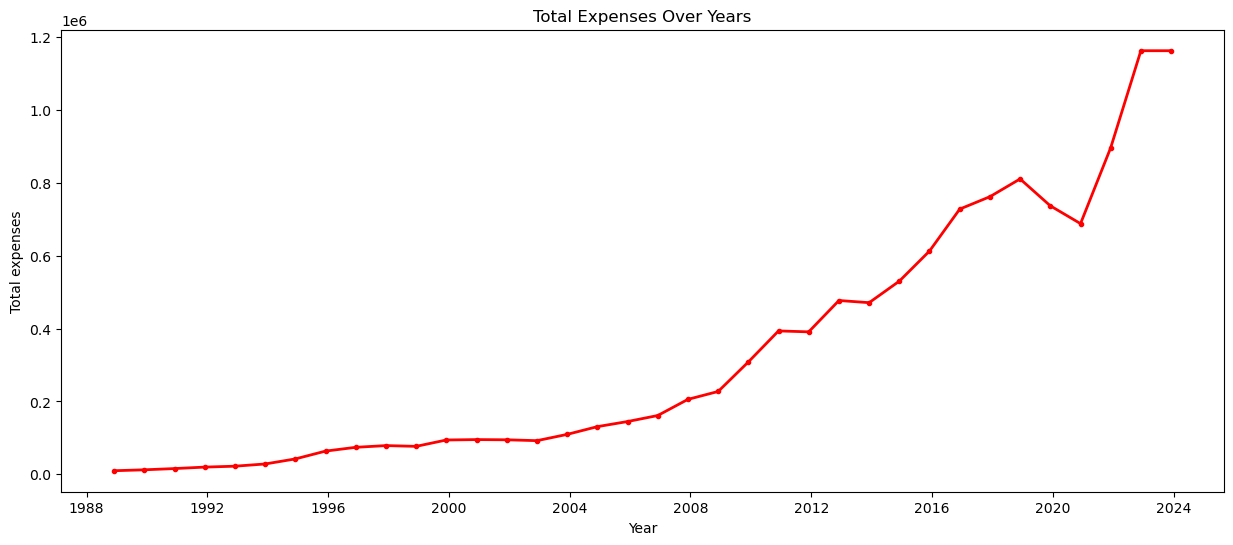

In [12]:
fig = plt.figure(figsize=(15,6))

plt.plot(df.index, df['Total expenses'], c='red', lw=2, marker=".")
plt.xlabel('Year')
plt.ylabel('Total expenses')
plt.title('Total Expenses Over Years')
plt.show()

### Decomposition of Time Series Data

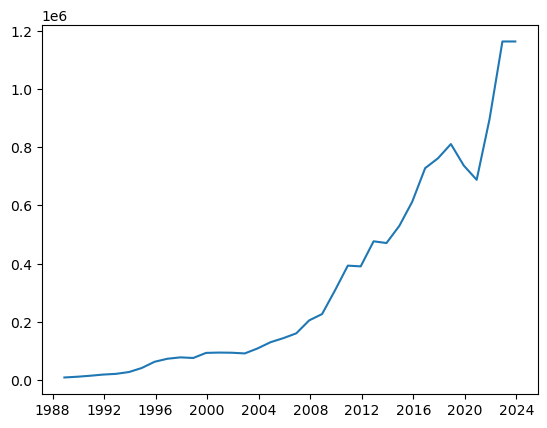

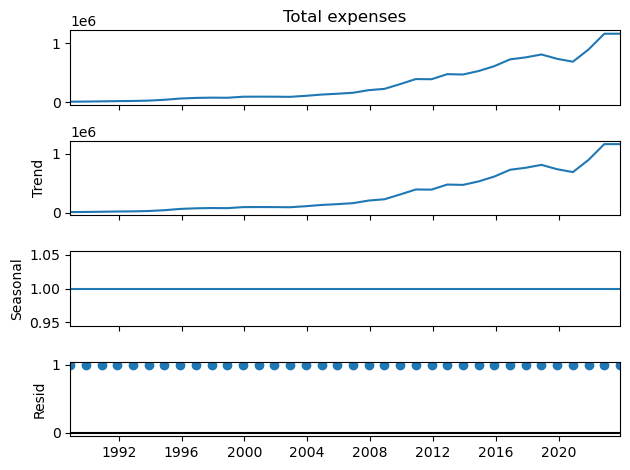

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Total expenses'], model = 'multiplicative')
plt.plot(df['Total expenses'])
result.plot()
plt.show()

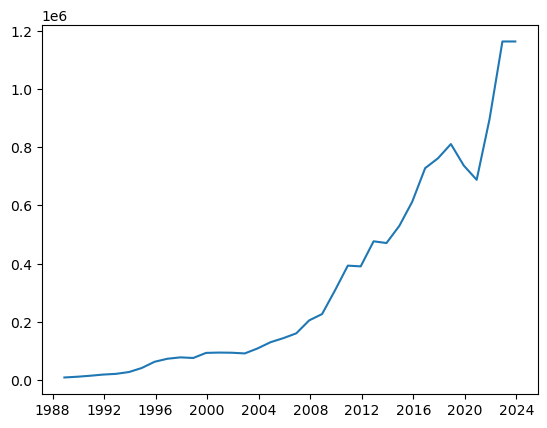

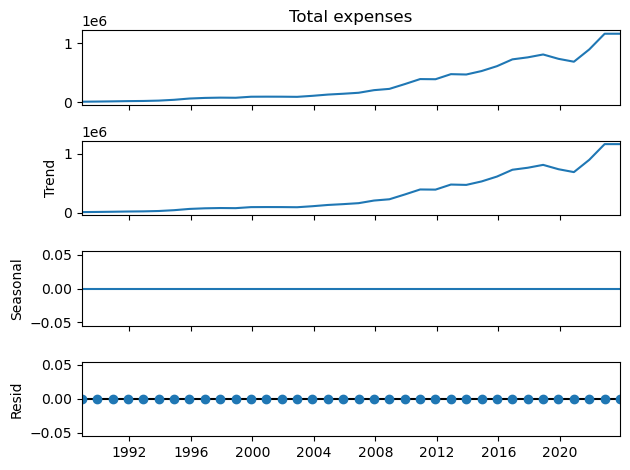

In [14]:
result = seasonal_decompose(df['Total expenses'], model = 'additive')
plt.plot(df['Total expenses'])
result.plot()
plt.show()

#### Checking if the data is stationary

In [15]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

adf_test = adfuller(df['Total expenses'])

pd.Series(adf_test[1:2], index = ['p-value'])

p-value    0.868173
dtype: float64

p value is coming 0.86 so we need to convert this data into stationary data

### Converting non stationary Time series data to stationary Time series data

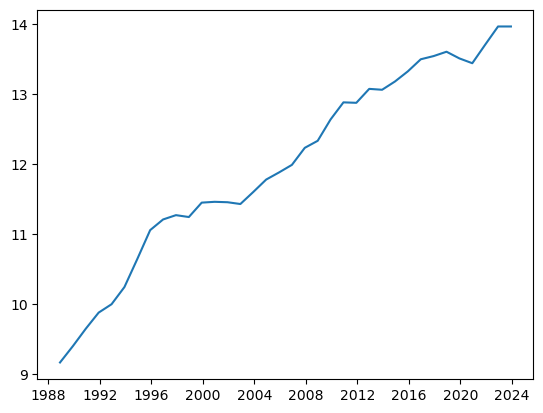

In [16]:
log_df = np.log(df['Total expenses'])
plt.plot(log_df)
plt.show()

In [17]:
mean = log_df.rolling(window = 12).mean()
scaled_df = log_df-mean
scaled_df.dropna(inplace = True)

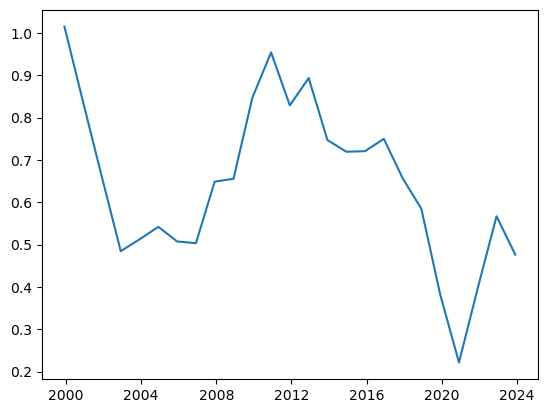

In [18]:
plt.plot(scaled_df)

In [19]:
adf_test1 = adfuller(scaled_df)

pd.Series(adf_test1[1:2], index = ['p-value'])

p-value    0.208056
dtype: float64

Still p is not less than 0.05 so will have to keep doing it until the value of p is less than 0.05.

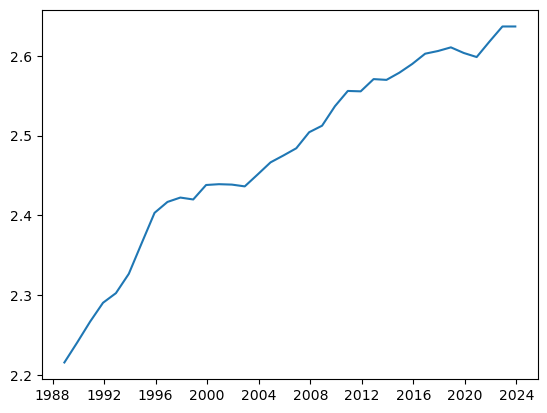

In [20]:
log_df1 = np.log(log_df)
plt.plot(log_df1)
plt.show()

In [21]:
mean1 = log_df1.rolling(window = 12).mean()
scaled_df1 = log_df1-mean1
scaled_df1.dropna(inplace = True)

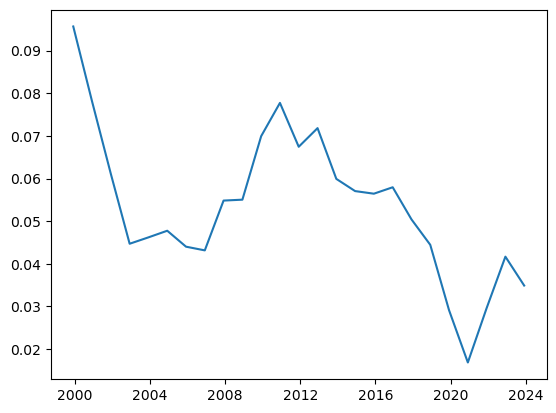

In [22]:
plt.plot(scaled_df1)

In [23]:
adf_test2 = adfuller(scaled_df1)

pd.Series(adf_test2[1:2], index = ['p-value'])

p-value    0.111676
dtype: float64

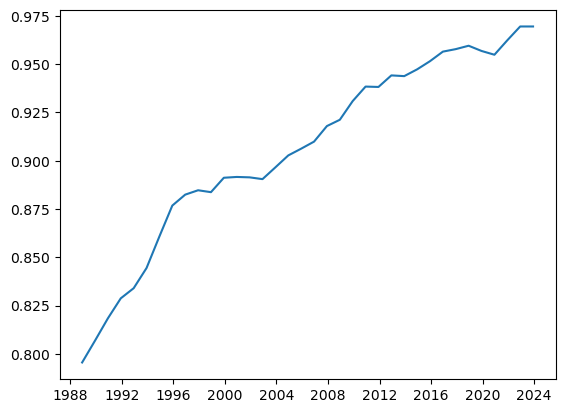

In [24]:
log_df2 = np.log(log_df1)
plt.plot(log_df2)
plt.show()

In [25]:
mean2 = log_df2.rolling(window = 12).mean()
scaled_df2 = log_df2-mean2
scaled_df2.dropna(inplace = True)

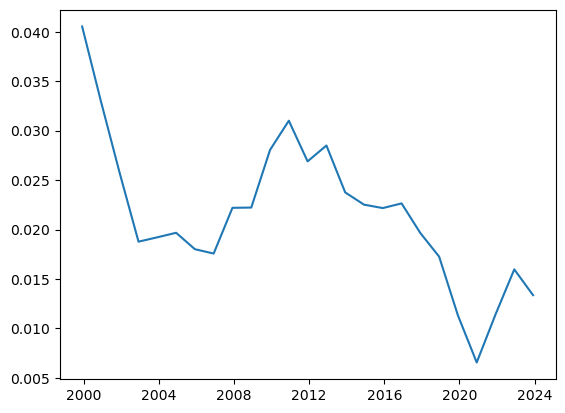

In [26]:
plt.plot(scaled_df2)

In [27]:
adf_test3 = adfuller(scaled_df2)

pd.Series(adf_test3[1:2], index = ['p-value'])

p-value    0.076164
dtype: float64

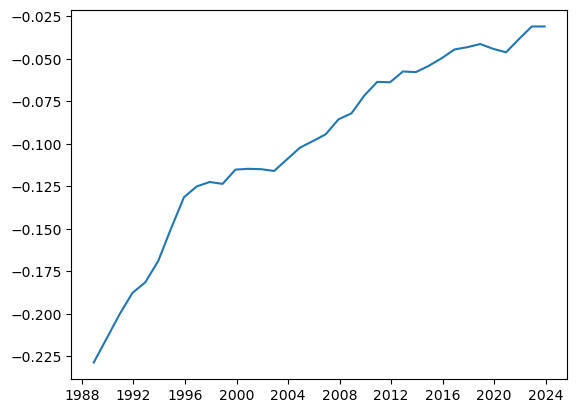

In [28]:
log_df3 = np.log(log_df2)
plt.plot(log_df3)
plt.show()

In [29]:
mean3 = log_df3.rolling(window = 12).mean()
scaled_df3 = log_df3-mean3
scaled_df3.dropna(inplace = True)

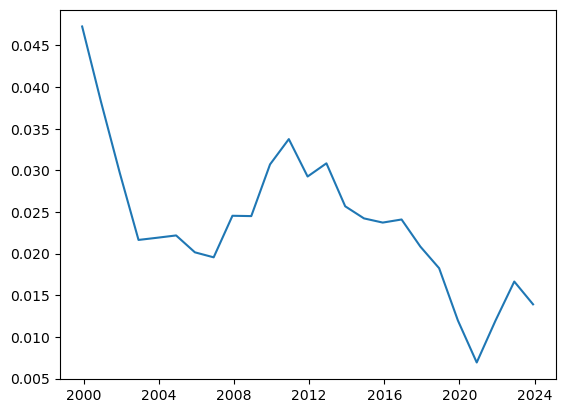

In [30]:
plt.plot(scaled_df3)

In [31]:
adf_test4 = adfuller(scaled_df3)

pd.Series(adf_test4[1:2], index = ['p-value'])

# data is now stationary

p-value    0.043431
dtype: float64

After doing it 4 times the p value is less than 0.05 now our data is stationary

### Model Auto Regressive Model

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_df3, test_size = 0.1, shuffle = False)

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train, lags = 10).fit()

C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)


In [33]:
test

Year
2021-12-01    0.011963
2022-12-01    0.016651
2023-12-01    0.013916
Name: Total expenses, dtype: float64

In [34]:
pred_arm = model.predict(start = "2021-12-01", end = "2023-12-01")
pred_arm

C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2021-12-01    0.053708
2022-12-01    0.227440
2023-12-01    0.709127
Freq: AS-DEC, dtype: float64

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
score_arm = r2_score(test, pred_arm)
mse_arm = mean_squared_error(test, pred_arm)
print(score_arm, mse_arm, sep = "\n")

-47733.28619480435
0.1764977606532991


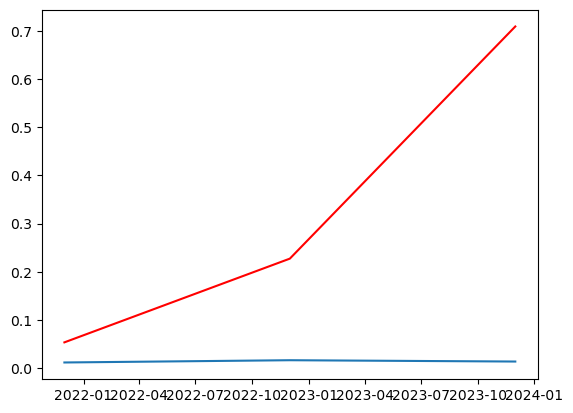

In [36]:
plt.plot(test)
plt.plot(pred_arm, color = 'red')
plt.show()

In [37]:
pred1 = model.predict(start = "2023-12-01", end = "2024-12-01")

C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## ARIMA Model

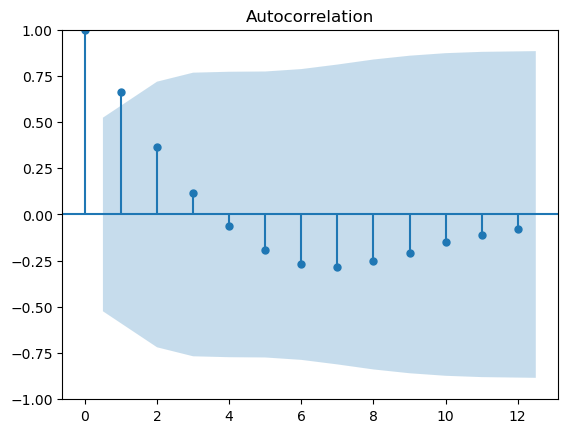

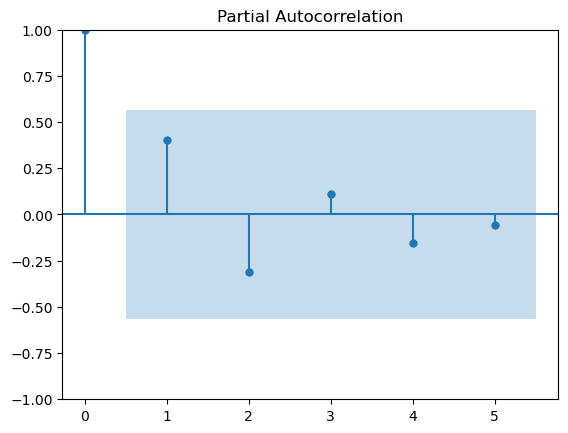

In [38]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lag_acf = acf(scaled_df3)
lag_pacf = pacf(scaled_df3)

plot_acf(lag_acf)
plot_pacf(lag_pacf, lags = 5)
plt.show()

In [39]:
# d=4 (we have done difference 4 times so d is 4)
# q=2 (from the pacf we can see q is 2)
# p=1 (this needs to be changed to get the best value of r2 score)

In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_df3, test_size = 0.1, shuffle = False)

from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train, order = (1,4,2))
model_arima = model_arima.fit()

C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
pred_arima = model_arima.predict(start = "2021-12-01", end = "2023-12-01")

In [49]:
score = r2_score(test, pred_arima)
mse = mean_squared_error(test, pred_arima)
print(score, mse, sep = "\n")

-239.33127216375576
0.0008886260743222015


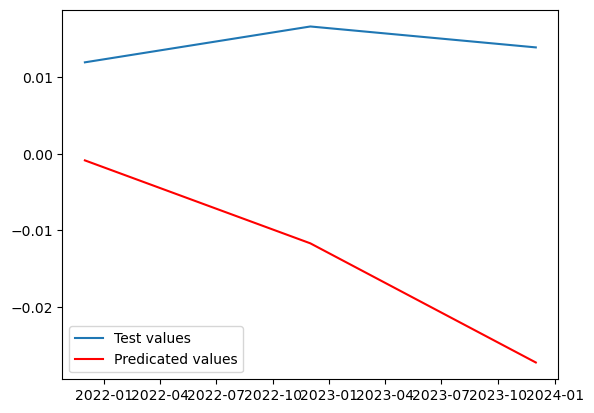

In [50]:
plt.plot(test, label = 'Test values')
plt.plot(pred_arima, color = 'red', label = 'Predicated values')
plt.legend(loc = 'best')
plt.show()

In [121]:
from statsmodels.tsa.arima.model import ARIMA
model_arima1 = ARIMA(train, order = (24,4,2))
model_arima1 = model_arima1.fit()

C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Abhinav\anaconda3\Lib\site-packages\statsmodels\base\model

In [122]:
pred_arima = model_arima1.predict(start = "2021-12-01", end = "2023-12-01")

In [123]:
score_arima = r2_score(test, pred_arima)
mse = mean_squared_error(test, pred_arima)
print(score, mse, sep = "\n")

-239.33127216375576
3.9870473847378466e-05


After using different values of "p", at p = 24 there is no difference in r2 score but mean square error is the least at this value.